In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import datetime
import time

In [ ]:
pip install basemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 99.3 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.0
    Uninstalling pyproj-3.7.0:
      Successfully uninstalled pyproj-3.7.0
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2


In [ ]:
df = pd.read_csv('/content/database.csv')
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [ ]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [ ]:
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [ ]:
col_num = df.select_dtypes(include=['int32','int64','float64'])
col_cat = df.select_dtypes(include=['object'])

###**Univariate Analysis**

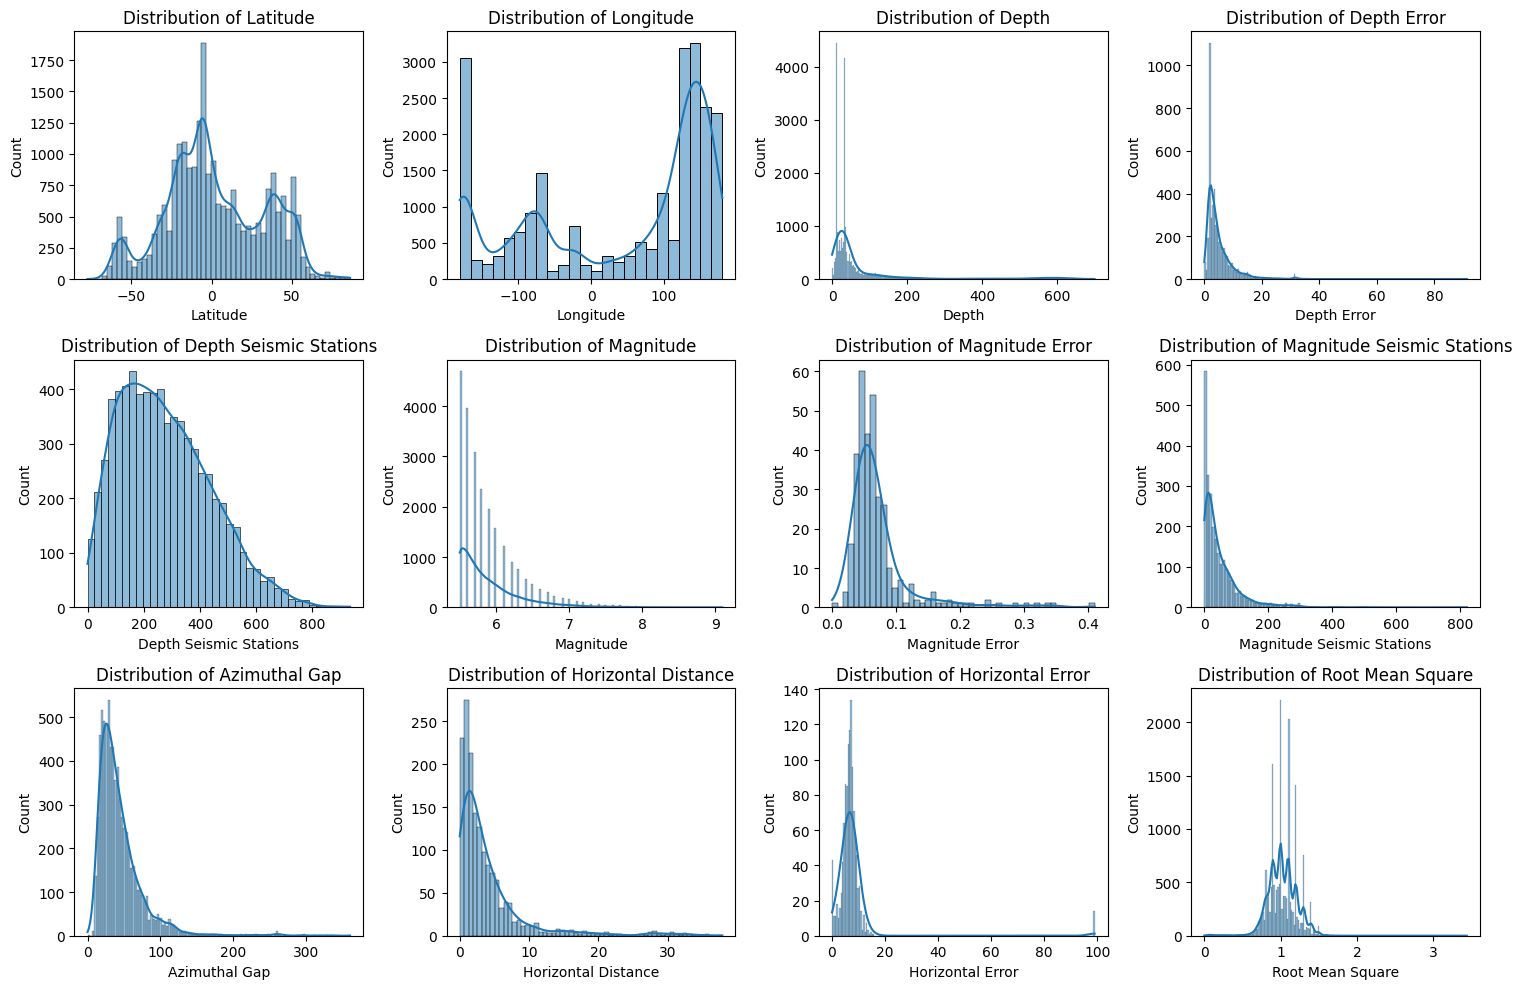

In [ ]:
#distribution univariate for numerical columns
plt.figure(figsize=(15,10))
for i,column in enumerate(['Latitude', 'Longitude', 'Depth', 'Depth Error','Depth Seismic Stations', 'Magnitude','Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap','Horizontal Distance', 'Horizontal Error', 'Root Mean Square'],1):
  plt.subplot(3,4,i)
  sns.histplot(df[column],kde=True)
  plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

<ipython-input-17-e6ecd05e223a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[column],palette='viridis')
<ipython-input-17-e6ecd05e223a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[column],palette='viridis')
<ipython-input-17-e6ecd05e223a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[column],palette='viridis')
<ipython-input-17-e6ecd05e223a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same

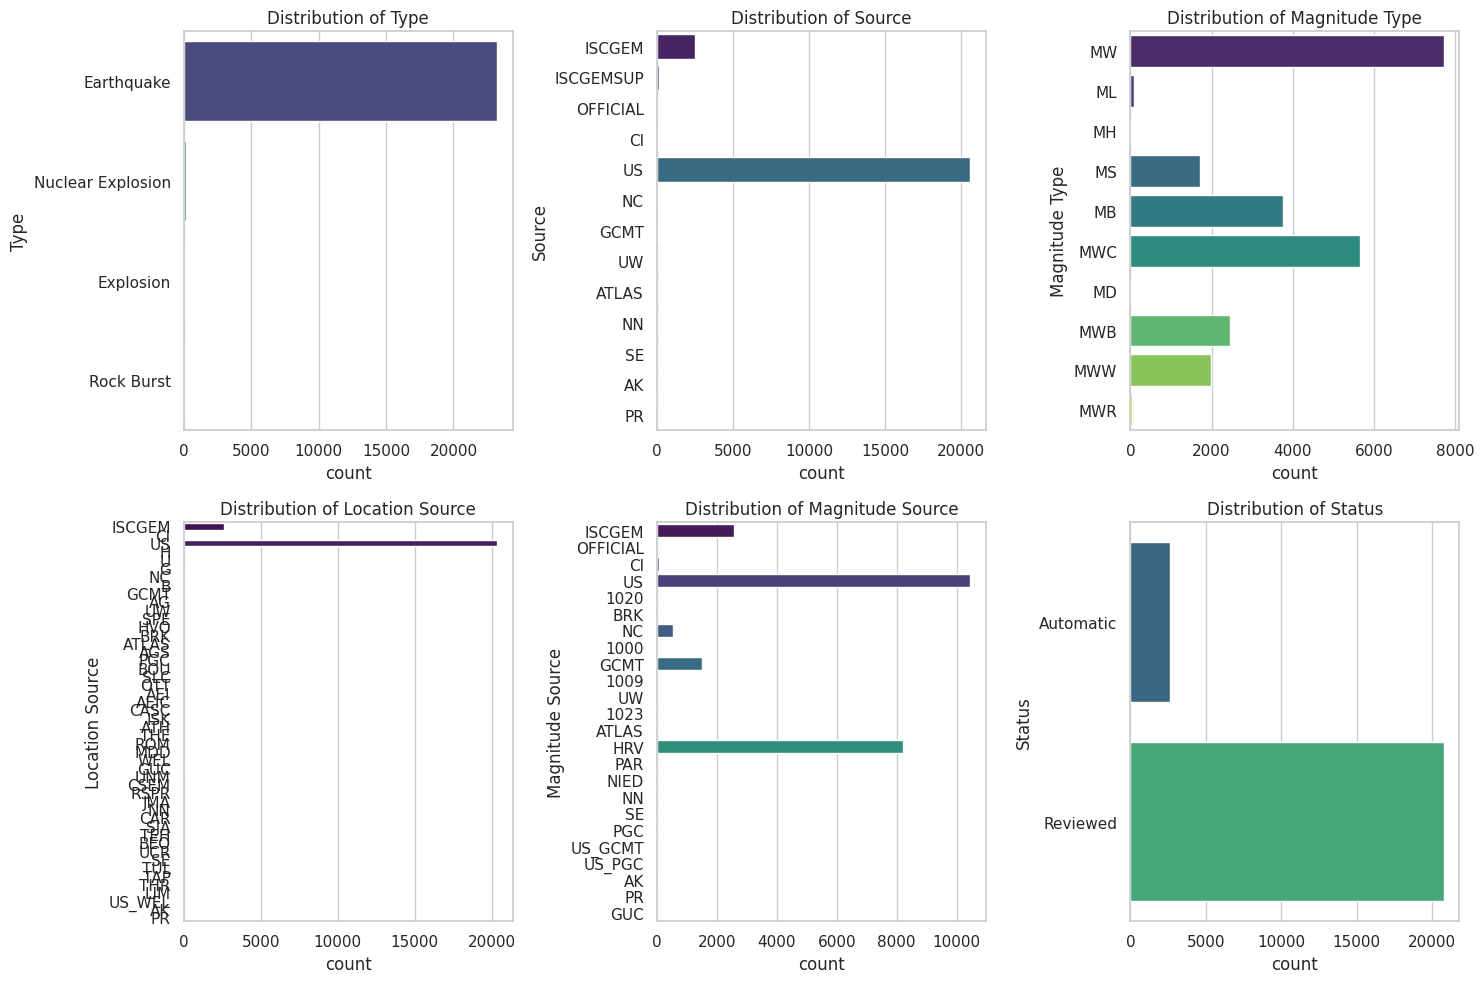

In [ ]:
#distribution univariate for categorical columns
sns.set(style='whitegrid')
plt.figure(figsize=(15,10))
for i,column in enumerate(['Type','Source','Magnitude Type', 'Location Source', 'Magnitude Source', 'Status'],1):
  plt.subplot(2,3,i)
  sns.countplot(df[column],palette='viridis')
  plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

 Magnitude Inference


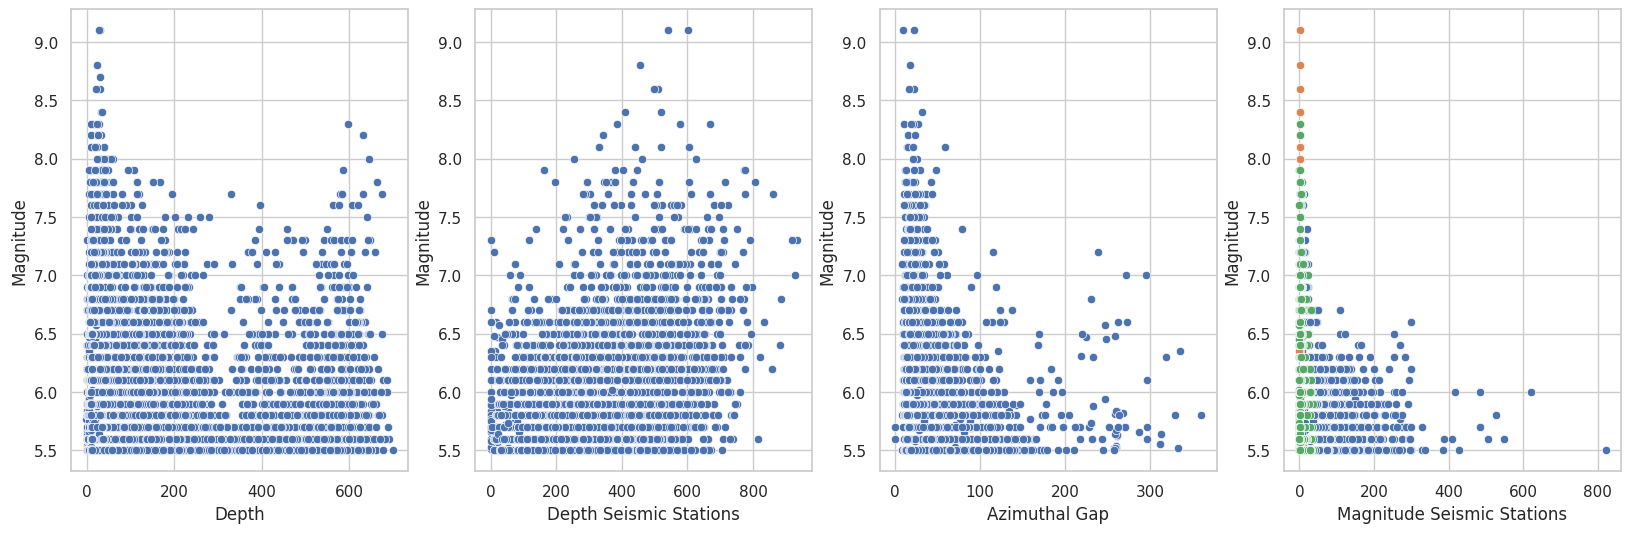

In [ ]:
print(' Magnitude Inference')
plt.figure(figsize = (20, 6))
plt.subplot(1, 4, 1)
sns.scatterplot(x='Depth',y='Magnitude',data=df)
plt.subplot(1, 4, 2)
sns.scatterplot(x='Depth Seismic Stations',y='Magnitude',data=df)
plt.subplot(1, 4, 3)
sns.scatterplot(x='Azimuthal Gap',y='Magnitude',data=df)
plt.subplot(1, 4, 4)
sns.scatterplot(x='Magnitude Seismic Stations',y='Magnitude',data=df)
plt.subplot(1, 4, 4)
sns.scatterplot(x='Root Mean Square',y='Magnitude',data=df)
plt.subplot(1, 4, 4)
sns.scatterplot(x='Horizontal Distance',y='Magnitude',data=df)
plt.show()

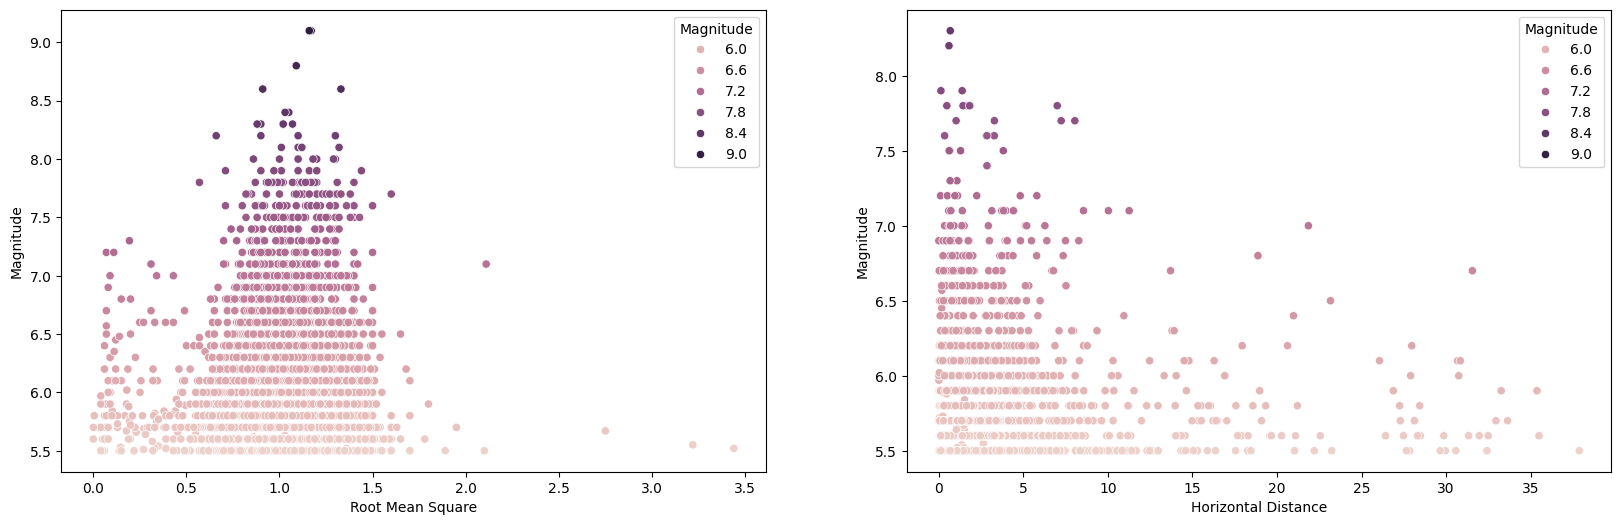

In [ ]:
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Root Mean Square',y='Magnitude',data=df,hue=df['Magnitude'])
plt.subplot(1, 2, 2)
sns.scatterplot(x='Horizontal Distance',y='Magnitude',data=df,hue=df['Magnitude'])
plt.show()

In [ ]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = df["Longitude"].tolist()
latitudes = df["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)


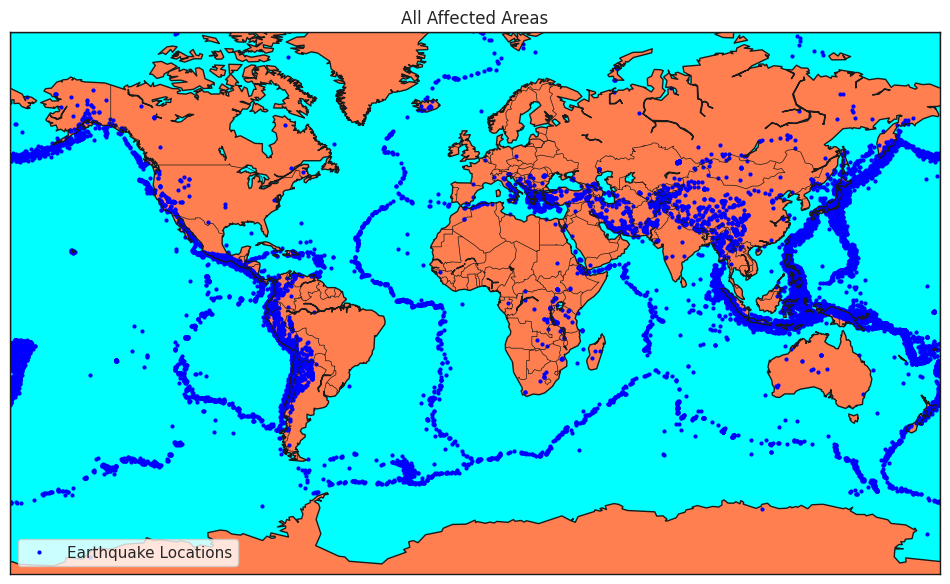

In [ ]:
fig = plt.figure(figsize=(12, 10))
plt.title("All Affected Areas")

# Create a new Basemap object
m = Basemap(projection='mill',
            llcrnrlat=-80, urcrnrlat=80,
            llcrnrlon=-180, urcrnrlon=180,
            lat_ts=20, resolution='c')

# Example longitude and latitude lists
longitudes = df["Longitude"].tolist()
latitudes = df["Latitude"].tolist()

# Convert longitudes and latitudes to Basemap projection coordinates
x, y = m(longitudes, latitudes)

# Plot the points
m.plot(x, y, "o", markersize=2, color='blue', label="Earthquake Locations")

# Add map features
m.drawcoastlines()
m.fillcontinents(color='coral', lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.drawcountries()

# Add a legend
plt.legend(loc='lower left')

# Show the plot
plt.show()

##**Data Processing**

In [ ]:
df_copy = df.copy()

###**1.Fix Date Format**

In [ ]:
date_lengths = df_copy.Date.str.len()
date_lengths.value_counts()

,count
Date,
10,23409
24,3


In [ ]:
indices = np.where([date_lengths ==24])[1]
print('Indices with corrupted data:', indices)
df_copy.loc[indices]

Indices with corrupted data: [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


In [ ]:

df_copy.loc[3378, "Date"] = "02/23/1975"
df_copy.loc[7512, "Date"] = "04/28/1985"
df_copy.loc[20650, "Date"] = "03/13/2011"

In [ ]:
#after fixing date column
df_copy.loc[[3378,7512,20650]]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,02/23/1975,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,04/28/1985,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,03/13/2011,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


###**2.Null Value Handling**

In [ ]:
print(df_copy.isnull().sum())

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64


In [ ]:
for feature in df_copy.columns:
    print(feature, np.round(df_copy[feature].isna().mean(),2)*100)

Date 0.0
Time 0.0
Latitude 0.0
Longitude 0.0
Type 0.0
Depth 0.0
Depth Error 81.0
Depth Seismic Stations 70.0
Magnitude 0.0
Magnitude Type 0.0
Magnitude Error 99.0
Magnitude Seismic Stations 89.0
Azimuthal Gap 69.0
Horizontal Distance 93.0
Horizontal Error 95.0
Root Mean Square 26.0
ID 0.0
Source 0.0
Location Source 0.0
Magnitude Source 0.0
Status 0.0


In [ ]:
threshold = 0.7
# Drop columns with more than 50% missing values from df_copy
df_copy.drop(columns=df_copy.columns[df_copy.isna().mean() > threshold], inplace=True)
df_copy.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Azimuthal Gap', 'Root Mean Square', 'ID', 'Source', 'Location Source',
       'Magnitude Source', 'Status'],
      dtype='object')

In [ ]:
print(df_copy.isnull().sum())

Date                          0
Time                          0
Latitude                      0
Longitude                     0
Type                          0
Depth                         0
Depth Seismic Stations    16315
Magnitude                     0
Magnitude Type                3
Azimuthal Gap             16113
Root Mean Square           6060
ID                            0
Source                        0
Location Source               0
Magnitude Source              0
Status                        0
dtype: int64


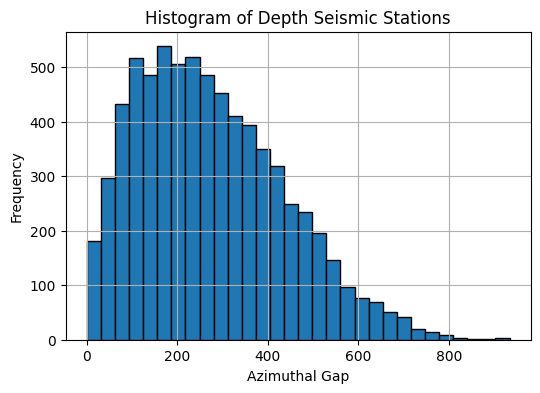

In [ ]:
plt.figure(figsize=(6, 4))
df_copy['Depth Seismic Stations'].hist(bins=30, edgecolor='k')
plt.title(f'Histogram of Depth Seismic Stations')
plt.xlabel('Azimuthal Gap')
plt.ylabel('Frequency')
plt.show()

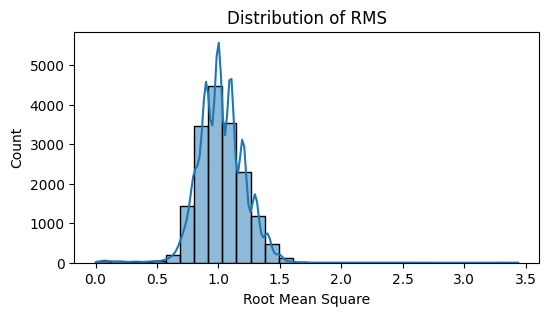

distribution before handling


In [ ]:
#Hnadling Missing Values of RMS and Magnitude Type

plt.figure(figsize=(6, 3))
sns.histplot(df_copy['Root Mean Square'], kde=True, bins=30)
plt.title(f"Distribution of RMS")
plt.show()
print('distribution before handling')

In [ ]:
df_copy['Depth Seismic Stations'].fillna(df_copy['Depth Seismic Stations'].median(), inplace=True)
df_copy['Azimuthal Gap'].fillna(df_copy['Azimuthal Gap'].median(), inplace=True)
df_copy['Root Mean Square'].fillna(df_copy['Root Mean Square'].mean(), inplace=True)

<ipython-input-22-56390a180256>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Depth Seismic Stations'].fillna(df_copy['Depth Seismic Stations'].median(), inplace=True)
<ipython-input-22-56390a180256>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

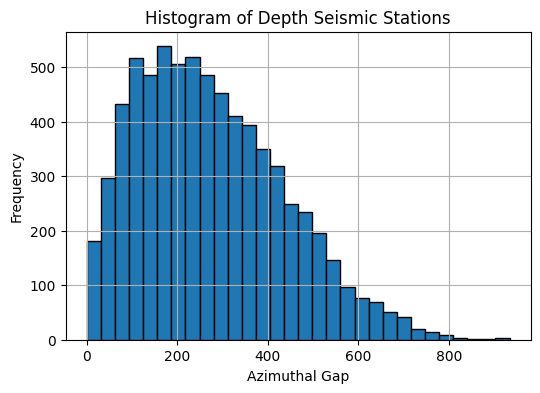

In [ ]:
#distribution after handling
plt.figure(figsize=(6, 4))
df_copy['Depth Seismic Stations'].hist(bins=30, edgecolor='k')
plt.title(f'Histogram of Depth Seismic Stations')
plt.xlabel('Azimuthal Gap')
plt.ylabel('Frequency')
plt.show()

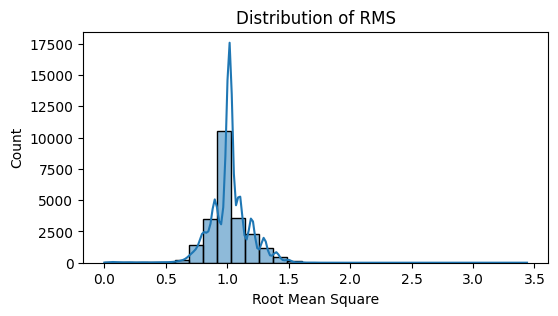

distribution after handling


In [ ]:
plt.figure(figsize=(6, 3))
sns.histplot(df_copy['Root Mean Square'], kde=True, bins=30)
plt.title(f"Distribution of RMS")
plt.show()
print("distribution after handling")

In [ ]:
#Magnitude type handled with mode
#df_copy['Magnitude Type'].fillna(df_copy['Magnitude Type'].mode()[0], inplace=True)

<ipython-input-29-3c671e33bf51>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Magnitude Type'].fillna(df_copy['Magnitude Type'].mode()[0], inplace=True)


In [ ]:
print(df_copy.isnull().sum())

Date                      0
Time                      0
Latitude                  0
Longitude                 0
Type                      0
Depth                     0
Depth Seismic Stations    0
Magnitude                 0
Magnitude Type            3
Azimuthal Gap             0
Root Mean Square          0
ID                        0
Source                    0
Location Source           0
Magnitude Source          0
Status                    0
dtype: int64


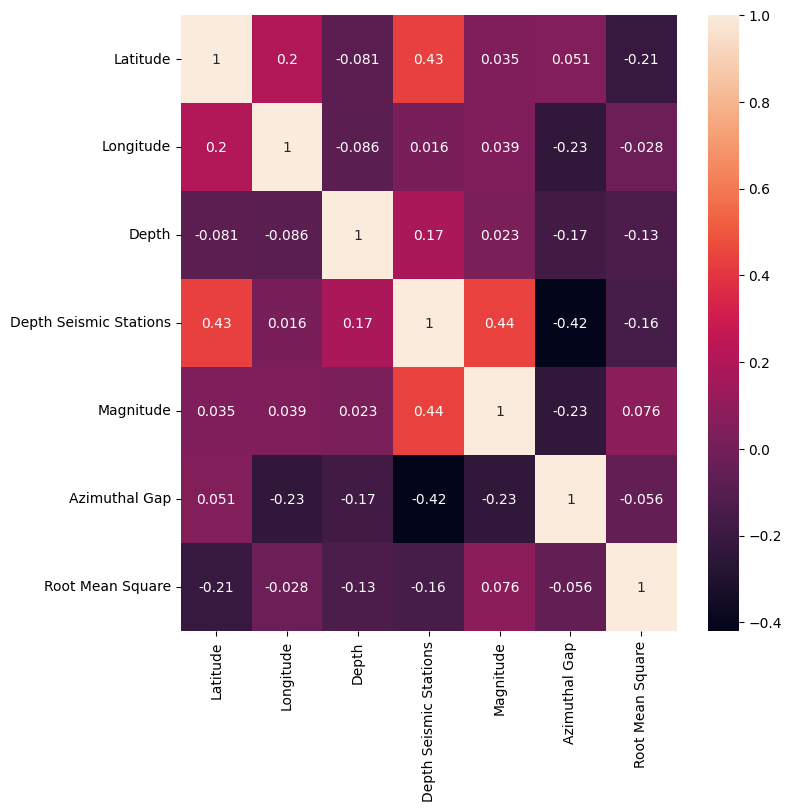

In [ ]:
numeric_df = df_copy.select_dtypes(include=['number'])

# Compute and plot correlation matrix
plt.figure(figsize=(8, 8))
dataplot = sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

In [ ]:
df_copy[['Type','Magnitude Type','ID','Source', 'Location Source', 'Magnitude Source', 'Status']].nunique()

,0
Type,4
Magnitude Type,10
ID,23412
Source,13
Location Source,48
Magnitude Source,24
Status,2


In [ ]:
#Drop ID column as it is unique for every row
df_copy.drop(columns=['ID'], inplace=True)

In [ ]:
print("Unique Values in column Type ")
print(df['Type'].unique())
print("Unique Values in column Magnitude Type ")
print(df['Magnitude Type'].unique())
print("Unique Values in column Source ")
print(df['Source'].unique())
print("Unique Values in column Location Source ")
print(df['Location Source'].unique())
print("Unique Values in column Magnitude Source ")
print(df['Magnitude Source'].unique())
print("Unique Values in column Status ")
print(df['Status'].unique())

Unique Values in column Type 
['Earthquake' 'Nuclear Explosion' 'Explosion' 'Rock Burst']
Unique Values in column Magnitude Type 
['MW' 'ML' 'MH' 'MS' 'MB' 'MWC' 'MD' nan 'MWB' 'MWW' 'MWR']
Unique Values in column Source 
['ISCGEM' 'ISCGEMSUP' 'OFFICIAL' 'CI' 'US' 'NC' 'GCMT' 'UW' 'ATLAS' 'NN'
 'SE' 'AK' 'PR']
Unique Values in column Location Source 
['ISCGEM' 'CI' 'US' 'H' 'U' 'G' 'NC' 'B' 'GCMT' 'AG' 'UW' 'SPE' 'HVO'
 'BRK' 'ATLAS' 'AGS' 'PGC' 'BOU' 'SLC' 'OTT' 'AEI' 'AEIC' 'CASC' 'ISK'
 'ATH' 'THE' 'ROM' 'MDD' 'WEL' 'GUC' 'UNM' 'CSEM' 'RSPR' 'JMA' 'NN' 'CAR'
 'SJA' 'TEH' 'BEO' 'UCR' 'SE' 'TUL' 'TAP' 'THR' 'LIM' 'US_WEL' 'AK' 'PR']
Unique Values in column Magnitude Source 
['ISCGEM' 'OFFICIAL' 'CI' 'US' '1020' 'BRK' 'NC' '1000' 'GCMT' '1009' 'UW'
 '1023' 'ATLAS' 'HRV' 'PAR' 'NIED' 'NN' 'SE' 'PGC' 'US_GCMT' 'US_PGC' 'AK'
 'PR' 'GUC']
Unique Values in column Status 
['Automatic' 'Reviewed']


In [ ]:
#categorical columns cannot help
df_copy.drop(['Type', 'Source', 'Location Source', 'Magnitude Source', 'Status'], axis=1, inplace=True)

In [ ]:
df_copy.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Depth',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Azimuthal Gap', 'Root Mean Square'],
      dtype='object')

###**3.Outlier Handling**

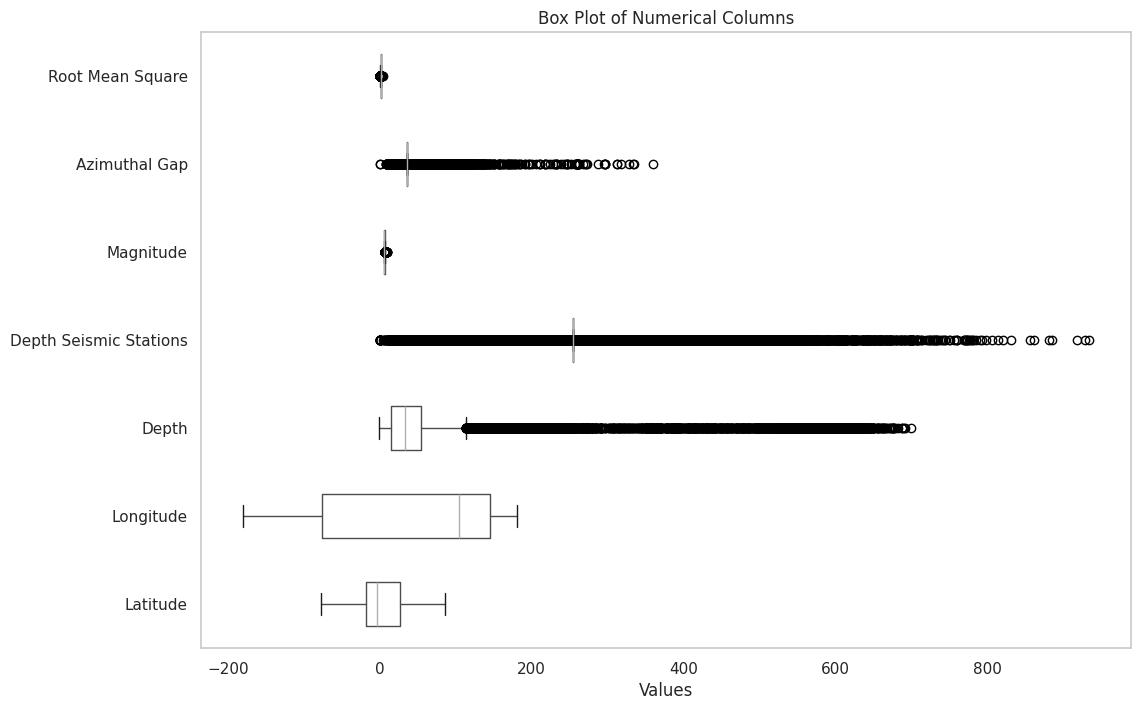

In [ ]:
df_copy.boxplot(figsize=(12, 8), vert=False, grid=False)
plt.title("Box Plot of Numerical Columns")
plt.xlabel("Values")
plt.show()

In [ ]:
# Handling outliers in depth
df_copy['Depth'] = np.log1p(df_copy['Depth'])
df_copy['Depth Seismic Stations'] = np.log1p(df_copy['Depth Seismic Stations'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Frequency')

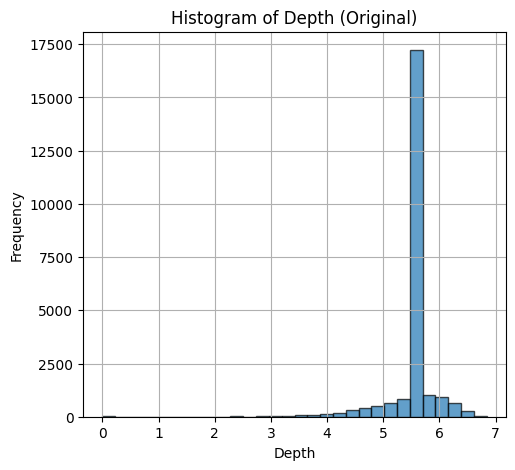

In [ ]:
# Plot histograms before and after log transformation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df_copy['Depth Seismic Stations'].hist(bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Depth (Original)')
plt.xlabel('Depth')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

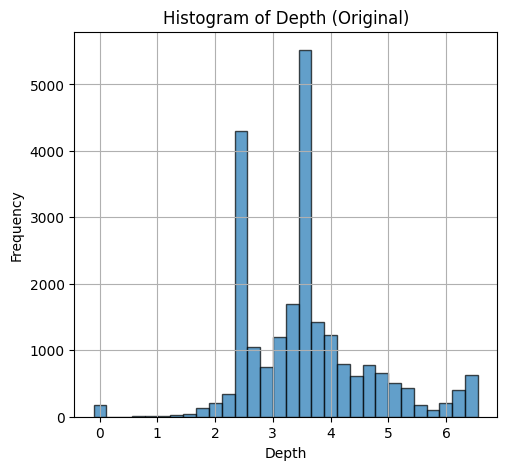

In [ ]:
# Plot histograms before and after log transformation for Depth
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df_copy['Depth'].hist(bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Depth (Original)')
plt.xlabel('Depth')
plt.ylabel('Frequency')

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    23412 non-null  object 
 1   Time                    23412 non-null  object 
 2   Latitude                23412 non-null  float64
 3   Longitude               23412 non-null  float64
 4   Depth                   23411 non-null  float64
 5   Depth Seismic Stations  23412 non-null  float64
 6   Magnitude               23412 non-null  float64
 7   Magnitude Type          23412 non-null  object 
 8   Azimuthal Gap           23412 non-null  float64
 9   Root Mean Square        23412 non-null  float64
dtypes: float64(7), object(3)
memory usage: 1.8+ MB


##**Feature Engineering**

In [ ]:

# Convert timezone-aware entries to timezone-naive explicitly
df_copy['Date'] = pd.to_datetime(df_copy['Date'], errors='coerce', utc=True).dt.tz_localize(None)

# calculate elapsed days since the base date
base_date = df_copy['Date'].min()
df_copy['Elapsed_Days_Since_Base'] = (df_copy['Date'] - base_date).dt.days

In [ ]:
df_copy['Elapsed_Days_Since_Base'].isnull().sum()

0

In [ ]:
df_copy.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Seismic Stations,Magnitude,Magnitude Type,Azimuthal Gap,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Elapsed_Days_Since_Base
0,1965-01-02,13:44:18,19.246,145.616,Earthquake,4.887337,5.545177,6.0,MW,36.0,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,0
1,1965-01-04,11:29:49,1.863,127.352,Earthquake,4.394449,5.545177,5.8,MW,36.0,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,2
2,1965-01-05,18:05:58,-20.579,-173.972,Earthquake,3.044522,5.545177,6.2,MW,36.0,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,3
3,1965-01-08,18:49:43,-59.076,-23.557,Earthquake,2.772589,5.545177,5.8,MW,36.0,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,6
4,1965-01-09,13:32:50,11.938,126.427,Earthquake,2.772589,5.545177,5.8,MW,36.0,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,7


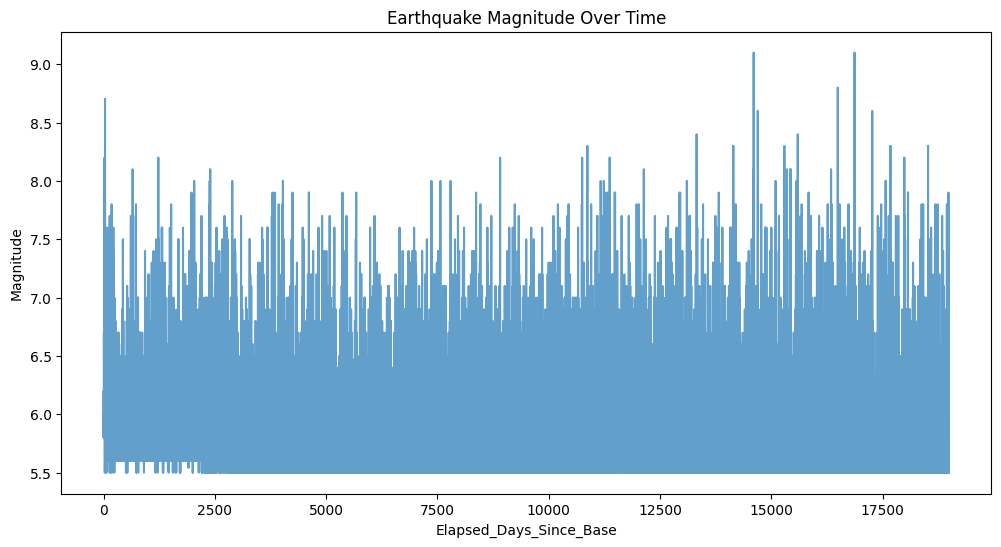

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_copy['Elapsed_Days_Since_Base'], df_copy['Magnitude'], alpha=0.7)
plt.title('Earthquake Magnitude Over Time')
plt.xlabel('Elapsed_Days_Since_Base')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
df_copy.drop(['Date', 'Time'], axis=1, inplace=True)

In [ ]:
df_copy.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Azimuthal Gap', 'Root Mean Square', 'ID', 'Source', 'Location Source',
       'Magnitude Source', 'Status', 'Elapsed_Days_Since_Base'],
      dtype='object')

##**Encoding**

In [ ]:
categorical_columns = ['Magnitude Type']
categorical_columns

['Magnitude Type']

In [ ]:
# Encode categorical features using label encoding
from sklearn.preprocessing import OneHotEncoder

# Initialize label encoder
#categorical_columns=df_copy['Magnitude Type']
encoder = OneHotEncoder(sparse_output=False)

# Encode categorical features
one_hot_encoded = encoder.fit_transform(df_copy[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df_copy, one_hot_df], axis=1)

# Drop the original categorical columns
df_copy = df_encoded.drop(categorical_columns, axis=1)
print(f"Encoded Employee data : \n{df_copy}")

# Verify encoding
#df_copy[['Magnitude Type']].head()

Encoded Employee data : 
            Date      Time  Latitude  Longitude        Type     Depth  \
0     1965-01-02  13:44:18   19.2460   145.6160  Earthquake  4.887337   
1     1965-01-04  11:29:49    1.8630   127.3520  Earthquake  4.394449   
2     1965-01-05  18:05:58  -20.5790  -173.9720  Earthquake  3.044522   
3     1965-01-08  18:49:43  -59.0760   -23.5570  Earthquake  2.772589   
4     1965-01-09  13:32:50   11.9380   126.4270  Earthquake  2.772589   
...          ...       ...       ...        ...         ...       ...   
23407 2016-12-28  08:22:12   38.3917  -118.8941  Earthquake  2.587764   
23408 2016-12-28  09:13:47   38.3777  -118.8957  Earthquake  2.282382   
23409 2016-12-28  12:38:51   36.9179   140.4262  Earthquake  2.397895   
23410 2016-12-29  22:30:19   -9.0283   118.6639  Earthquake  4.382027   
23411 2016-12-30  20:08:28   37.3973   141.4103  Earthquake  2.560323   

       Depth Seismic Stations  Magnitude  Azimuthal Gap  Root Mean Square  \
0                    

##**Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_columns = df_copy.select_dtypes(include=["number"]).columns
df_copy[numerical_columns] = scaler.fit_transform(df_copy[numerical_columns])
df_copy.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Seismic Stations,Magnitude,Azimuthal Gap,Root Mean Square,...,Magnitude Type_MD,Magnitude Type_MH,Magnitude Type_ML,Magnitude Type_MS,Magnitude Type_MW,Magnitude Type_MWB,Magnitude Type_MWC,Magnitude Type_MWR,Magnitude Type_MWW,Magnitude Type_nan
0,1965-01-02,13:44:18,0.590649,0.904493,Earthquake,0.749769,0.810634,0.138889,0.1,0.297321,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1965-01-04,11:29:49,0.484060,0.853759,Earthquake,0.675701,0.810634,0.083333,0.1,0.297321,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1965-01-05,18:05:58,0.346451,0.016736,Earthquake,0.472843,0.810634,0.194444,0.1,0.297321,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1965-01-08,18:49:43,0.110396,0.434562,Earthquake,0.431979,0.810634,0.083333,0.1,0.297321,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1965-01-09,13:32:50,0.545838,0.851190,Earthquake,0.431979,0.810634,0.083333,0.1,0.297321,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(df_copy.isnull().sum())

Date                       0
Time                       0
Latitude                   0
Longitude                  0
Type                       0
Depth                      1
Depth Seismic Stations     0
Magnitude                  0
Azimuthal Gap              0
Root Mean Square           0
ID                         0
Source                     0
Location Source            0
Magnitude Source           0
Status                     0
Elapsed_Days_Since_Base    0
Magnitude Type_MB          0
Magnitude Type_MD          0
Magnitude Type_MH          0
Magnitude Type_ML          0
Magnitude Type_MS          0
Magnitude Type_MW          0
Magnitude Type_MWB         0
Magnitude Type_MWC         0
Magnitude Type_MWR         0
Magnitude Type_MWW         0
Magnitude Type_nan         0
dtype: int64


In [ ]:
df_copy['Depth'] = df_copy['Depth'].apply(lambda x: x if x >= 0 else 0)

In [ ]:
print(df_copy.isnull().sum())

Date                       0
Time                       0
Latitude                   0
Longitude                  0
Type                       0
Depth                      0
Depth Seismic Stations     0
Magnitude                  0
Azimuthal Gap              0
Root Mean Square           0
ID                         0
Source                     0
Location Source            0
Magnitude Source           0
Status                     0
Elapsed_Days_Since_Base    0
Magnitude Type_MB          0
Magnitude Type_MD          0
Magnitude Type_MH          0
Magnitude Type_ML          0
Magnitude Type_MS          0
Magnitude Type_MW          0
Magnitude Type_MWB         0
Magnitude Type_MWC         0
Magnitude Type_MWR         0
Magnitude Type_MWW         0
Magnitude Type_nan         0
dtype: int64


##**Export Processed Data**

In [ ]:
file_name = 'Earthquake_data_processed.csv'

# saving the excel
df_copy.to_csv(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [ ]:
df_model = pd.read_csv('/content/Earthquake_data_processed.csv')
df_model.head()

,Unnamed: 0,Date,Time,Latitude,Longitude,Type,Depth,Depth Seismic Stations,Magnitude,Azimuthal Gap,...,Magnitude Type_MD,Magnitude Type_MH,Magnitude Type_ML,Magnitude Type_MS,Magnitude Type_MW,Magnitude Type_MWB,Magnitude Type_MWC,Magnitude Type_MWR,Magnitude Type_MWW,Magnitude Type_nan
0,0,1965-01-02,13:44:18,0.590649,0.904493,Earthquake,0.749769,0.810634,0.138889,0.1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1965-01-04,11:29:49,0.484060,0.853759,Earthquake,0.675701,0.810634,0.083333,0.1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,1965-01-05,18:05:58,0.346451,0.016736,Earthquake,0.472843,0.810634,0.194444,0.1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,1965-01-08,18:49:43,0.110396,0.434562,Earthquake,0.431979,0.810634,0.083333,0.1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,1965-01-09,13:32:50,0.545838,0.851190,Earthquake,0.431979,0.810634,0.083333,0.1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_model.columns

Index(['Unnamed: 0', 'Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth',
       'Depth Seismic Stations', 'Magnitude', 'Azimuthal Gap',
       'Root Mean Square', 'ID', 'Source', 'Location Source',
       'Magnitude Source', 'Status', 'Elapsed_Days_Since_Base',
       'Magnitude Type_MB', 'Magnitude Type_MD', 'Magnitude Type_MH',
       'Magnitude Type_ML', 'Magnitude Type_MS', 'Magnitude Type_MW',
       'Magnitude Type_MWB', 'Magnitude Type_MWC', 'Magnitude Type_MWR',
       'Magnitude Type_MWW', 'Magnitude Type_nan'],
      dtype='object')

##**Partition of data into train and test**

In [ ]:
# Select relevant columns
x = df_model[['Latitude', 'Longitude', 'Depth',
       'Depth Seismic Stations', 'Magnitude', 'Azimuthal Gap',
       'Root Mean Square', 'Elapsed_Days_Since_Base',
       'Magnitude Type_MB', 'Magnitude Type_MD', 'Magnitude Type_MH',
       'Magnitude Type_ML', 'Magnitude Type_MS', 'Magnitude Type_MW',
       'Magnitude Type_MWB', 'Magnitude Type_MWC', 'Magnitude Type_MWR',
       'Magnitude Type_MWW', 'Magnitude Type_nan']]
y = df_model['Magnitude']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# Train the linear regression model
l_regressor = LinearRegression()
l_regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predict on the testing set
y_pred = l_regressor.predict(x_test)

##**Model Evaluation**

###**Linear Regression**

In [ ]:
scores= {"Model name": ["Linear regression", "SVM", "Random Forest", "XGBoost", ], "mse": [], "R^2": []}

# Compute R^2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

scores['mse'].append(mse)
scores['R^2'].append(r2)

print("MSE: {:.2f}, R^2: {:.2f}".format(mse, r2))

MSE: 0.00, R^2: 1.00


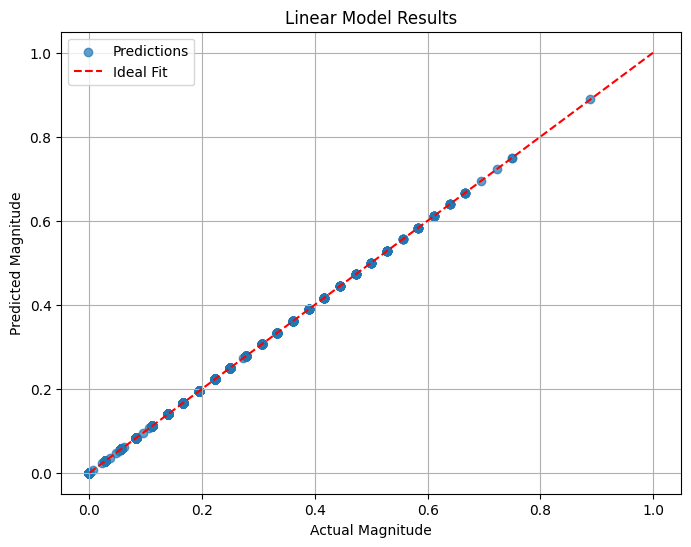

In [ ]:
# Plotting the predicted vs actual magnitudes for the Linear model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Linear Model Results')
plt.legend()
plt.grid()
plt.show()

###**Support Vector Machine**

In [ ]:
# Create an SVM model
svm = SVR(kernel='rbf')
# Train the SVM model on the subset of data
svm.fit(x_train, y_train)

# Predict on the testing set
y_pred_svm = svm.predict(x_test)

# Compute R^2 and MSE
r2_svm = r2_score(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)

scores['mse'].append(mse_svm)
scores['R^2'].append(r2_svm)

print("MSE: {:.2f}, SVM R^2: {:.2f}".format( mse_svm, r2_svm))

MSE: 0.00, SVM R^2: 0.71


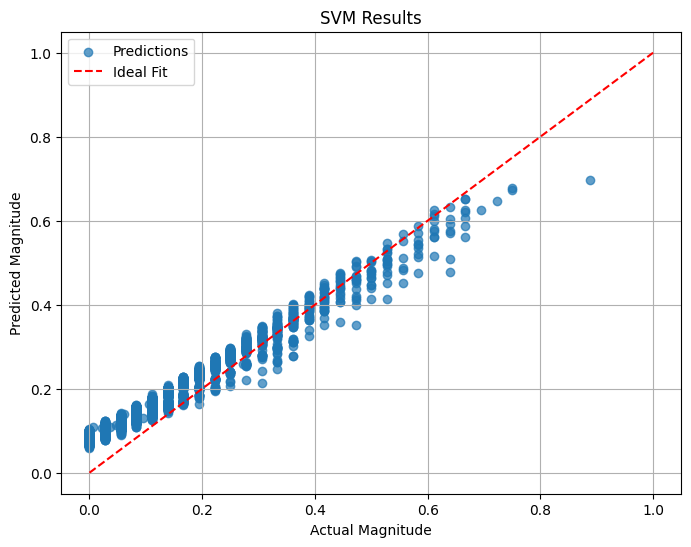

In [ ]:
# Plotting predicted vs. actual magnitudes for SVM
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svm, alpha=0.7, label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title('SVM Results')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.legend()
plt.grid()
plt.show()

###**Random Forest Regressor**

In [ ]:
# Initialize and train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train, y_train)

# Make predictions with the Random Forest model
y_pred_rf = rf_regressor.predict(x_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

scores['mse'].append(mse_rf)
scores['R^2'].append(r2_rf)

# Display the evaluation metrics for the Random Forest model
mse_rf, r2_rf

(4.982182071744142e-08, 0.9999963660314448)

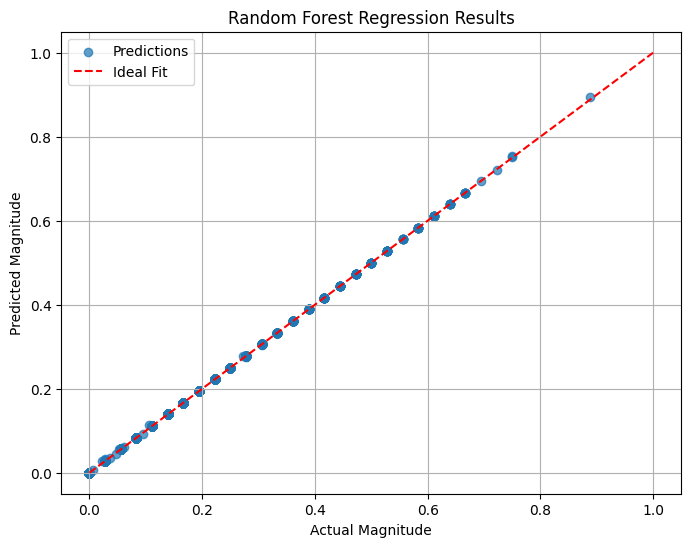

In [ ]:
# Plot the predicted and actual values
# Plotting the predicted vs actual magnitudes for the Random Forest model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Random Forest Regression Results')
plt.legend()
plt.grid()
plt.show()

###**XGBoost Regressor**

In [ ]:
# Initialize and train an XGBoost Regressor
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_regressor.fit(x_train, y_train)

# Make predictions with the XGBoost model
y_pred_xgb = xgb_regressor.predict(x_test)

# Evaluate the XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

scores['mse'].append(mse_xgb)
scores['R^2'].append(r2_xgb)

# Display the evaluation metrics for the XGBoost model
mse_xgb, r2_xgb

(1.1126912195019525e-07, 0.9999918841085189)

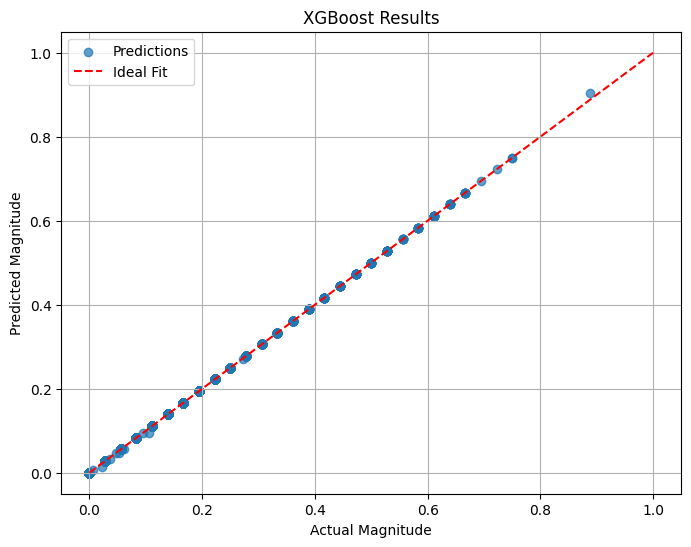

In [ ]:
# Plotting the predicted vs actual magnitudes for the XGBoost model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.7, label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('XGBoost Results')
plt.legend()
plt.grid()
plt.show()

##**Feature Importance**

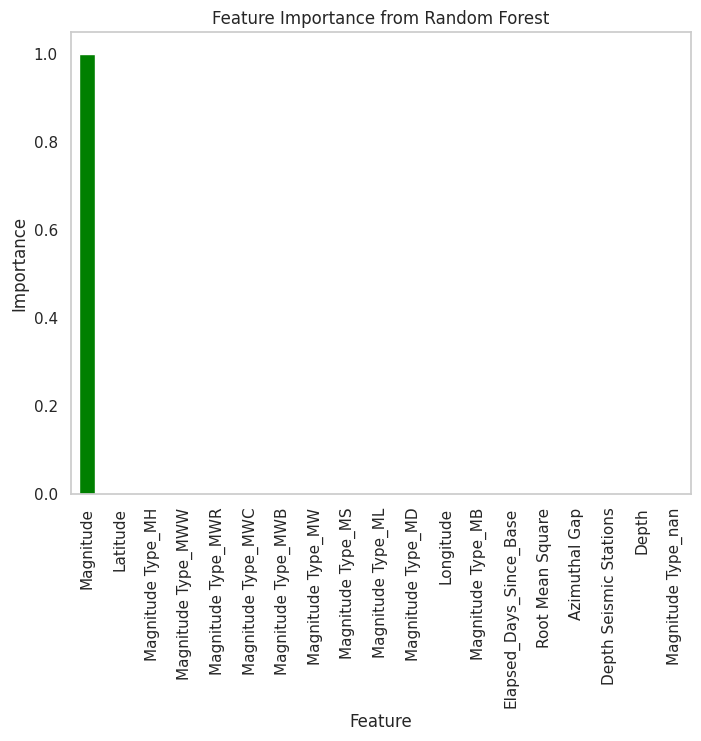

,Feature,Importance
4,Magnitude,0.999884
0,Latitude,0.000116
10,Magnitude Type_MH,0.000000
17,Magnitude Type_MWW,0.000000
16,Magnitude Type_MWR,0.000000
15,Magnitude Type_MWC,0.000000
14,Magnitude Type_MWB,0.000000
13,Magnitude Type_MW,0.000000
12,Magnitude Type_MS,0.000000
11,Magnitude Type_ML,0.000000


In [ ]:
# Extracting feature importance from the Random Forest model
feature_importances = xgb_regressor.feature_importances_
features = x.columns

# Creating a DataFrame for better visualization
sns.set(style='whitegrid')
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Displaying the feature importance
importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False, figsize=(8, 6),color='green')
plt.title('Feature Importance from Random Forest')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.grid()
plt.show()

importance_df

In [ ]:
#With Label Encoding
scores_df = pd.DataFrame(scores)
display(scores_df)

,Model name,mse,R^2
0,Linear regression,0.012712,0.072778
1,SVM,0.011603,0.153666
2,Random Forest,0.010933,0.202519
3,XGBoost,0.010403,0.241210


In [ ]:
#With One Hot Encoding
scores_df = pd.DataFrame(scores)
display(scores_df)

,Model name,mse,R^2
0,Linear regression,1.381528e-32,1.000000
1,SVM,4.034263e-03,0.705744
2,Random Forest,4.982182e-08,0.999996
3,XGBoost,1.112691e-07,0.999992
